<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/Reuters_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
from keras.datasets import reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
# we vectorize the train and test data

In [0]:
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
X_train =vectorize_sequences(train_data)
X_test =vectorize_sequences(test_data)

In [0]:
# and we one-hot-encode the labels

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [0]:
## we build validation sets

In [0]:
X_val = X_train[:1000]
partial_X_train= X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [0]:
##### the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(partial_X_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (X_val,y_val))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/sample - loss: 2.6642 - acc: 0.5571 - val_loss: 1.7293 - val_acc: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 129us/sample - loss: 1.4112 - acc: 0.7150 - val_loss: 1.3139 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 123us/sample - loss: 1.0427 - acc: 0.7781 - val_loss: 1.1523 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 128us/sample - loss: 0.8241 - acc: 0.8260 - val_loss: 1.0517 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 126us/sample - loss: 0.6624 - acc: 0.8623 - val_loss: 0.9818 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 125us/sample - loss: 0.5286 - acc: 0.8928 - val_loss: 0.9524 - val_acc: 0.7930
Epoch 7/20
7982/7982 [=====================

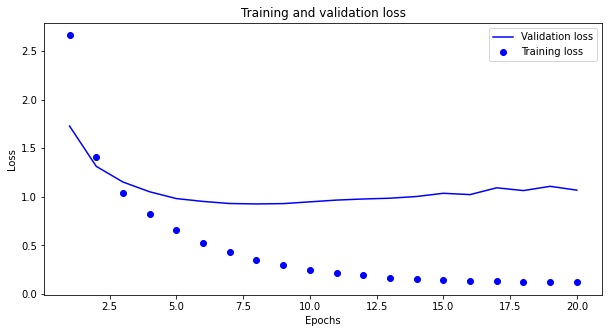

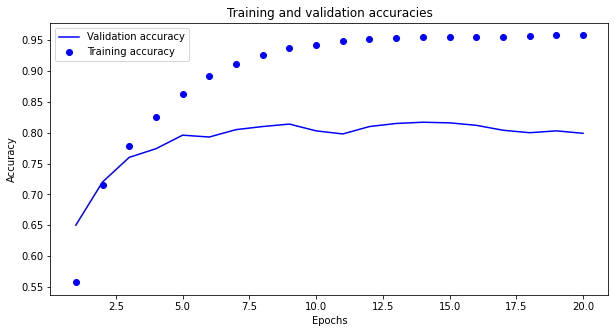

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1,len(loss)+1)

plt.figure(figsize=(10,5))
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.title('Training and validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#### new model

In [0]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train,partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (X_val,y_val))

results = model.evaluate(X_test,y_test)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 138us/sample - loss: 2.7064 - acc: 0.5018 - val_loss: 1.7610 - val_acc: 0.6640
Epoch 2/9
7982/7982 [==============================] - 1s 122us/sample - loss: 1.4193 - acc: 0.7139 - val_loss: 1.2749 - val_acc: 0.7280
Epoch 3/9
7982/7982 [==============================] - 1s 129us/sample - loss: 1.0397 - acc: 0.7853 - val_loss: 1.0996 - val_acc: 0.7740
Epoch 4/9
7982/7982 [==============================] - 1s 122us/sample - loss: 0.8179 - acc: 0.8275 - val_loss: 1.0177 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 124us/sample - loss: 0.6558 - acc: 0.8619 - val_loss: 0.9633 - val_acc: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 123us/sample - loss: 0.5242 - acc: 0.8916 - val_loss: 0.9000 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 123us/sample - loss: 0.4259 - acc: 0.9118 - val_loss: 0.8862 - val_acc: 

[0.9761423461689869, 0.79162955]

In [0]:
predictions = model.predict(X_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

1.0

In [0]:
np.argmax(predictions[0])

3

In [0]:
### This model has a bottleneck

In [0]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train,partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (X_val,y_val))

results = model.evaluate(X_test,y_test)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 335us/sample - loss: 3.6799 - acc: 0.0203 - val_loss: 3.4886 - val_acc: 0.0420
Epoch 2/9
7982/7982 [==============================] - 1s 124us/sample - loss: 3.3284 - acc: 0.1244 - val_loss: 3.2149 - val_acc: 0.2550
Epoch 3/9
7982/7982 [==============================] - 1s 123us/sample - loss: 3.0295 - acc: 0.2593 - val_loss: 2.9784 - val_acc: 0.2660
Epoch 4/9
7982/7982 [==============================] - 1s 123us/sample - loss: 2.7717 - acc: 0.2836 - val_loss: 2.7849 - val_acc: 0.2810
Epoch 5/9
7982/7982 [==============================] - 1s 124us/sample - loss: 2.5555 - acc: 0.3224 - val_loss: 2.6139 - val_acc: 0.3120
Epoch 6/9
7982/7982 [==============================] - 1s 123us/sample - loss: 2.3626 - acc: 0.3607 - val_loss: 2.4725 - val_acc: 0.3260
Epoch 7/9
7982/7982 [==============================] - 1s 121us/sample - loss: 2.1678 - acc: 0.3889 - val_loss: 2.3044 - val_acc: 

[1.88331050673236, 0.65138024]

In [0]:
### This has a more wide inner layer

In [0]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(46,activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train,partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (X_val,y_val))

results = model.evaluate(X_test,y_test)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 153us/sample - loss: 2.3986 - acc: 0.5415 - val_loss: 1.5864 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 126us/sample - loss: 1.3070 - acc: 0.7146 - val_loss: 1.2226 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 126us/sample - loss: 0.9881 - acc: 0.7825 - val_loss: 1.0928 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 127us/sample - loss: 0.7663 - acc: 0.8364 - val_loss: 1.0051 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 126us/sample - loss: 0.6077 - acc: 0.8685 - val_loss: 0.9549 - val_acc: 0.7990
Epoch 6/9
7982/7982 [==============================] - 1s 127us/sample - loss: 0.4713 - acc: 0.8986 - val_loss: 0.8930 - val_acc: 0.8080
Epoch 7/9
7982/7982 [==============================] - 1s 123us/sample - loss: 0.3759 - acc: 0.9219 - val_loss: 0.8794 - val_acc: 

[0.9997013621529828, 0.78762245]